# Import Required Libraries

In [116]:
## Import Libraries for Data Preparation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Data Preprocessing

## Import Dataset to Dataframe

In [2]:
df1 = pd.read_csv('aggregate_median_irregularities_Kota Bandung.csv')
df2 = pd.read_csv('aggregate_median_irregularities_Kota Banjar.csv')
df3 = pd.read_csv('aggregate_median_irregularities_Kota Bekasi.csv')
df4 = pd.read_csv('aggregate_median_irregularities_Kota Bogor.csv')
df5 = pd.read_csv('aggregate_median_irregularities_Kota Cimahi.csv')
df6 = pd.read_csv('aggregate_median_irregularities_Kota Cirebon.csv')
df7 = pd.read_csv('aggregate_median_irregularities_Kota Depok.csv')
df8 = pd.read_csv('aggregate_median_irregularities_Kota Sukabumi.csv')
df9 = pd.read_csv('aggregate_median_irregularities_Kota Tasikmalaya.csv')

In [7]:
ir_data = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9])

ir_data['time'] = pd.to_datetime(ir_data['time'])
ir_data['median_jam_level'] = ir_data['median_jam_level'].astype(int)
ir_data['kemendagri_kabupaten_kode'] = ir_data['kemendagri_kabupaten_kode'].astype(str)
ir_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39456 entries, 0 to 138
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   time                       39456 non-null  datetime64[ns]
 1   kemendagri_kabupaten_kode  39456 non-null  object        
 2   kemendagri_kabupaten_nama  39456 non-null  object        
 3   street                     39297 non-null  object        
 4   jam_level                  39456 non-null  int64         
 5   median_length              39456 non-null  float64       
 6   median_delay_seconds       39456 non-null  float64       
 7   median_regular_speed       39456 non-null  float64       
 8   total_records              39456 non-null  int64         
 9   cause_type                 0 non-null      float64       
 10  median_seconds             39456 non-null  float64       
 11  median_speed               39456 non-null  float64       
 12  date  

## Check and Drop Missing/Duplicate Value

In [89]:
df = ir_data.copy()
print(len(df))
df.isna().sum()
df.reset_index(inplace=True, drop=True)
df

39456


,time,kemendagri_kabupaten_kode,kemendagri_kabupaten_nama,street,jam_level,median_length,median_delay_seconds,median_regular_speed,total_records,cause_type,median_seconds,median_speed,date,median_jam_level,id,geometry
0,2022-07-06 07:00:00,32.73,KOTA BANDUNG,Terusan Buah Batu,4,1922.0,657.0,15.770000,13,NaN,844.0,7.510,2022-07-06,4,1492848,"MULTILINESTRING ((107.638019 -6.965016, 107.63..."
1,2022-07-06 07:00:00,32.73,KOTA BANDUNG,Jenderal AH Nasution,3,1819.0,421.0,17.939999,2,NaN,572.0,11.600,2022-07-06,3,1492844,"LINESTRING (107.678021 -6.904799, 107.677631 -..."
2,2022-07-06 07:00:00,32.73,KOTA BANDUNG,Jenderal AH Nasution,4,1064.0,586.0,14.520000,11,NaN,675.0,6.140,2022-07-06,4,1492845,"MULTILINESTRING ((107.659819 -6.902242, 107.66..."
3,2022-07-06 07:00:00,32.73,KOTA BANDUNG,N11 Soekarno-Hatta,4,919.0,558.5,15.095000,20,NaN,632.0,4.970,2022-07-06,4,1492846,"MULTILINESTRING ((107.641468 -6.945648, 107.64..."
4,2022-07-06 07:00:00,32.73,KOTA BANDUNG,Terusan Buah Batu,3,2024.0,599.0,15.830000,1,NaN,786.0,9.260,2022-07-06,3,1492847,"LINESTRING (107.638019 -6.965016, 107.638179 -..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39451,2022-08-27 15:00:00,32.78,KOTA TASIKMALAYA,AH Nasution,3,2189.0,658.5,22.740000,12,NaN,845.5,9.305,2022-08-27,3,1570735,"MULTILINESTRING ((108.178006 -7.344607, 108.17..."
39452,2022-09-01 15:00:00,32.78,KOTA TASIKMALAYA,Ir H Juanda,4,714.0,525.0,26.440000,2,NaN,600.0,4.270,2022-09-01,4,1577278,"LINESTRING (108.198034 -7.33009, 108.198041 -7..."
39453,2022-09-01 16:00:00,32.78,KOTA TASIKMALAYA,Jenderal Ahmad Yani,4,602.0,386.0,18.020000,7,NaN,446.0,4.930,2022-09-01,4,1577279,"MULTILINESTRING ((108.228378 -7.325209, 108.22..."
39454,2022-09-01 17:00:00,32.78,KOTA TASIKMALAYA,Jenderal Ahmad Yani,4,524.0,287.0,19.310000,1,NaN,338.0,5.570,2022-09-01,4,1577280,"LINESTRING (108.228935 -7.324234, 108.2291 -7...."


In [90]:
df = df[~df.isna()]
df.drop(['cause_type'], axis=1, inplace=True)
print(len(df))
df.sample(10)

39456


,time,kemendagri_kabupaten_kode,kemendagri_kabupaten_nama,street,jam_level,median_length,median_delay_seconds,median_regular_speed,total_records,median_seconds,median_speed,date,median_jam_level,id,geometry
22384,2022-08-23 07:00:00,32.75,KOTA BEKASI,Jatibening Raya,4,555.0,623.0,12.585,20,698.5,2.855,2022-08-23,4,1565046,"MULTILINESTRING ((106.943086 -6.268021, 106.94..."
4247,2022-07-29 14:00:00,32.73,KOTA BANDUNG,Jenderal Ibrahim Adjie,3,1614.0,451.0,14.270,1,607.0,9.560,2022-07-29,3,1530936,"LINESTRING (107.64397 -6.930052, 107.644004 -6..."
36550,2022-08-16 17:00:00,32.76,KOTA DEPOK,N6 Jalan Raya Parung-Bogor,3,2939.0,812.0,17.715,12,1104.0,9.385,2022-08-16,3,1558782,"MULTILINESTRING ((106.7315 -6.429982, 106.7313..."
9847,2022-08-28 14:00:00,32.73,KOTA BANDUNG,Sirnamanah,4,545.0,214.0,8.470,7,699.0,2.800,2022-08-28,4,1572023,"MULTILINESTRING ((107.596949 -6.883996, 107.59..."
13792,2022-07-17 14:00:00,32.75,KOTA BEKASI,Jati Makmur,3,2478.0,715.0,21.240,27,1056.0,8.700,2022-07-17,3,1515505,"MULTILINESTRING ((106.918889 -6.285795, 106.91..."
12881,2022-07-14 21:00:00,32.75,KOTA BEKASI,N1 Jenderal Sudirman,4,1467.0,683.0,29.590,5,811.0,7.570,2022-07-14,4,1505665,"MULTILINESTRING ((106.992909 -6.233688, 106.99..."
13413,2022-07-16 16:00:00,32.75,KOTA BEKASI,Hankam Raya,4,2422.0,1229.0,11.100,81,1540.0,5.760,2022-07-16,4,1511573,"MULTILINESTRING ((106.916482 -6.290032, 106.91..."
3665,2022-07-25 17:00:00,32.73,KOTA BANDUNG,Tubagus Ismail,4,547.0,528.0,14.740,7,592.0,3.320,2022-07-25,4,1525912,"MULTILINESTRING ((107.618577 -6.88505, 107.617..."
29220,2022-08-29 14:00:00,32.71,KOTA BOGOR,Semplak Raya,3,539.0,171.0,21.340,2,242.0,8.010,2022-08-29,3,1573139,"LINESTRING (106.760395 -6.544563, 106.760212 -..."
12592,2022-07-13 07:00:00,32.75,KOTA BEKASI,Tol Cikampek (Cikunir-Cikarang),2,5149.0,296.5,64.980,8,556.0,33.300,2022-07-13,2,1503935,"MULTILINESTRING ((107.015865 -6.262432, 107.01..."


In [91]:
df[df.duplicated(keep='first')].sort_values(['kemendagri_kabupaten_nama', 'jam_level', 'id']).head(15)

,time,kemendagri_kabupaten_kode,kemendagri_kabupaten_nama,street,jam_level,median_length,median_delay_seconds,median_regular_speed,total_records,median_seconds,median_speed,date,median_jam_level,id,geometry


In [92]:
df = df.drop_duplicates(keep='first')
df

,time,kemendagri_kabupaten_kode,kemendagri_kabupaten_nama,street,jam_level,median_length,median_delay_seconds,median_regular_speed,total_records,median_seconds,median_speed,date,median_jam_level,id,geometry
0,2022-07-06 07:00:00,32.73,KOTA BANDUNG,Terusan Buah Batu,4,1922.0,657.0,15.770000,13,844.0,7.510,2022-07-06,4,1492848,"MULTILINESTRING ((107.638019 -6.965016, 107.63..."
1,2022-07-06 07:00:00,32.73,KOTA BANDUNG,Jenderal AH Nasution,3,1819.0,421.0,17.939999,2,572.0,11.600,2022-07-06,3,1492844,"LINESTRING (107.678021 -6.904799, 107.677631 -..."
2,2022-07-06 07:00:00,32.73,KOTA BANDUNG,Jenderal AH Nasution,4,1064.0,586.0,14.520000,11,675.0,6.140,2022-07-06,4,1492845,"MULTILINESTRING ((107.659819 -6.902242, 107.66..."
3,2022-07-06 07:00:00,32.73,KOTA BANDUNG,N11 Soekarno-Hatta,4,919.0,558.5,15.095000,20,632.0,4.970,2022-07-06,4,1492846,"MULTILINESTRING ((107.641468 -6.945648, 107.64..."
4,2022-07-06 07:00:00,32.73,KOTA BANDUNG,Terusan Buah Batu,3,2024.0,599.0,15.830000,1,786.0,9.260,2022-07-06,3,1492847,"LINESTRING (107.638019 -6.965016, 107.638179 -..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39451,2022-08-27 15:00:00,32.78,KOTA TASIKMALAYA,AH Nasution,3,2189.0,658.5,22.740000,12,845.5,9.305,2022-08-27,3,1570735,"MULTILINESTRING ((108.178006 -7.344607, 108.17..."
39452,2022-09-01 15:00:00,32.78,KOTA TASIKMALAYA,Ir H Juanda,4,714.0,525.0,26.440000,2,600.0,4.270,2022-09-01,4,1577278,"LINESTRING (108.198034 -7.33009, 108.198041 -7..."
39453,2022-09-01 16:00:00,32.78,KOTA TASIKMALAYA,Jenderal Ahmad Yani,4,602.0,386.0,18.020000,7,446.0,4.930,2022-09-01,4,1577279,"MULTILINESTRING ((108.228378 -7.325209, 108.22..."
39454,2022-09-01 17:00:00,32.78,KOTA TASIKMALAYA,Jenderal Ahmad Yani,4,524.0,287.0,19.310000,1,338.0,5.570,2022-09-01,4,1577280,"LINESTRING (108.228935 -7.324234, 108.2291 -7...."


## Outlier Processing

In [93]:
## Outlier Processing

# train_set
df_num = df[['median_length', 'median_regular_speed', 'total_records', 'median_seconds', 'median_speed','median_jam_level']].copy()
list_of_set_data = list()


for col_name in df_num.columns[:-1]:
    q1 = df_num[col_name].quantile(0.05) ## with 95% quantile
    q3 = df_num[col_name].quantile(0.95)
    iqr = q3 - q1
    
    df_num_cleaned = df_num[~((df_num[col_name] < (q1 - 1.5 * iqr)) | 
                              (df_num[col_name] > (q3 + 1.5 * iqr)))].copy()
    
    list_of_set_data.append(df_num_cleaned.copy())

df_num_cleaned = pd.concat(list_of_set_data)
count_duplicated_index = df_num_cleaned.index.value_counts()
used_index_data = count_duplicated_index[count_duplicated_index == (df_num.shape[1]-1)].index
df_num_cleaned = df_num_cleaned.loc[used_index_data].drop_duplicates()

print('Train number after cleaning',df_num_cleaned.shape)

Train number after cleaning (38704, 6)


## Data Categorization

In [94]:
## Convert into Datetime
# train_set

df_dt = pd.DataFrame(df['time'].copy())
df_dt_ = pd.DataFrame()

df_dt_['month'] = df_dt['time'].dt.month
df_dt_['day'] = df_dt['time'].dt.day
df_dt_['weekday'] = df_dt['time'].dt.weekday
df_dt_['hour'] = df_dt['time'].dt.hour
df_dt_

,month,day,weekday,hour
0,7,6,2,7
1,7,6,2,7
2,7,6,2,7
3,7,6,2,7
4,7,6,2,7
...,...,...,...,...
39451,8,27,5,15
39452,9,1,3,15
39453,9,1,3,16
39454,9,1,3,17


In [95]:
## Merge the cleaned and date time
df_cc = df_num_cleaned.merge(df_dt_, how='inner', left_index=True, right_index=True)
df_cc = df_cc.merge(df.select_dtypes(include='object'), how='inner', left_index=True, right_index=True)
df_cc.sample(10)

,median_length,median_regular_speed,total_records,median_seconds,median_speed,median_jam_level,month,day,weekday,hour,kemendagri_kabupaten_kode,kemendagri_kabupaten_nama,street,date,geometry
28323,1420.0,10.514999,56,1145.0,4.470,4,8,14,6,9,32.71,KOTA BOGOR,N9 Jalan Raya Dramaga,2022-08-14,"MULTILINESTRING ((106.739572 -6.570715, 106.73..."
36692,952.0,21.860000,3,521.0,6.570,4,8,16,1,20,32.76,KOTA DEPOK,Permata,2022-08-16,"MULTILINESTRING ((106.727845 -6.412256, 106.72..."
33978,828.0,20.760000,24,322.5,8.245,3,7,29,4,8,32.76,KOTA DEPOK,Cipayung Raya,2022-07-29,"MULTILINESTRING ((106.796258 -6.427222, 106.79..."
3539,1061.0,19.650000,1,468.0,8.150,3,7,25,0,10,32.73,KOTA BANDUNG,Merdeka,2022-07-25,"LINESTRING (107.610611 -6.906989, 107.610582 -..."
30477,654.0,15.010000,3,1078.0,2.180,4,8,12,4,15,32.77,KOTA CIMAHI,Jalan Serut,2022-08-12,"MULTILINESTRING ((107.560049 -6.876105, 107.55..."
2515,727.0,22.380000,1,548.0,4.770,4,7,19,1,11,32.73,KOTA BANDUNG,Merdeka,2022-07-19,"LINESTRING (107.610611 -6.906989, 107.610582 -..."
32003,601.0,9.080000,20,500.0,4.320,4,7,16,5,13,32.76,KOTA DEPOK,Krukut Raya,2022-07-16,"MULTILINESTRING ((106.792113 -6.34558, 106.792..."
33865,1168.0,34.830000,4,191.5,21.935,2,7,28,3,7,32.76,KOTA DEPOK,N8 Jalan Raya Bogor,2022-07-28,"MULTILINESTRING ((106.856071 -6.460576, 106.85..."
31616,896.0,11.840000,19,1061.0,2.970,4,7,13,2,20,32.76,KOTA DEPOK,Curug Agung,2022-07-13,"MULTILINESTRING ((106.798055 -6.367848, 106.79..."
23510,1149.0,11.060000,5,804.0,5.270,4,8,27,5,20,32.75,KOTA BEKASI,Jalan Jatiasih,2022-08-27,"MULTILINESTRING ((106.965569 -6.293202, 106.96..."


In [96]:
df_cc = df_cc[['median_length', 'median_regular_speed', 'total_records',
       'median_seconds', 'median_speed', 'median_jam_level', 'month', 'day', 'weekday', 'hour','kemendagri_kabupaten_nama']]

## Data Splitting

In [97]:
X = df_cc.drop('median_jam_level', axis = 1)
y = df_cc['median_jam_level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [98]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((27092, 10), (11612, 10), (27092,), (11612,))

In [99]:
train_set = X_train.merge(y_train, left_index=True, right_index=True)
test_set = X_test.merge(y_test, left_index=True, right_index=True)

train_set.sample(10)

,median_length,median_regular_speed,total_records,median_seconds,median_speed,month,day,weekday,hour,kemendagri_kabupaten_nama,median_jam_level
13013,979.0,20.570,5,522.0,7.340,7,15,4,19,KOTA BEKASI,3
19687,737.0,19.570,2,740.5,3.575,8,8,0,7,KOTA BEKASI,4
29984,1009.0,20.040,13,726.0,5.270,7,15,4,18,KOTA CIMAHI,4
36195,703.0,13.990,4,611.0,4.140,8,14,6,10,KOTA DEPOK,4
33866,1532.0,23.540,4,890.0,6.190,7,28,3,7,KOTA DEPOK,4
1418,1253.0,23.140,13,817.0,5.520,7,14,3,19,KOTA BANDUNG,4
33170,1579.0,19.365,22,904.0,6.760,7,21,3,15,KOTA DEPOK,4
35153,1805.0,23.770,27,451.0,13.290,8,6,5,18,KOTA DEPOK,3
22456,2439.0,14.990,27,1441.0,6.850,8,23,1,16,KOTA BEKASI,4
23242,971.0,20.670,2,398.0,8.760,8,27,5,12,KOTA BEKASI,3


# Exploratory Data Analysis

In [100]:
train_set.sample(10)

,median_length,median_regular_speed,total_records,median_seconds,median_speed,month,day,weekday,hour,kemendagri_kabupaten_nama,median_jam_level
12111,1361.0,11.07,3,677.0,7.220,7,8,4,21,KOTA BEKASI,4
15532,707.0,14.62,9,562.0,4.530,7,23,5,18,KOTA BEKASI,4
11983,827.0,12.96,19,482.0,6.170,7,8,4,18,KOTA BEKASI,4
33742,823.0,20.23,18,660.5,4.610,7,27,2,7,KOTA DEPOK,4
26105,1165.0,11.01,12,863.0,4.750,7,14,3,14,KOTA BOGOR,4
17912,1400.0,22.75,9,339.0,15.130,8,2,1,14,KOTA BEKASI,2
31486,1950.0,11.63,29,1135.0,6.170,7,12,1,19,KOTA DEPOK,4
25508,547.0,16.57,39,316.0,6.400,9,3,5,20,KOTA BEKASI,3
11370,817.0,11.84,2,504.0,5.820,7,6,2,12,KOTA BEKASI,4
2575,1163.0,16.69,8,426.0,9.325,7,19,1,17,KOTA BANDUNG,3


<AxesSubplot:xlabel='kemendagri_kabupaten_nama'>

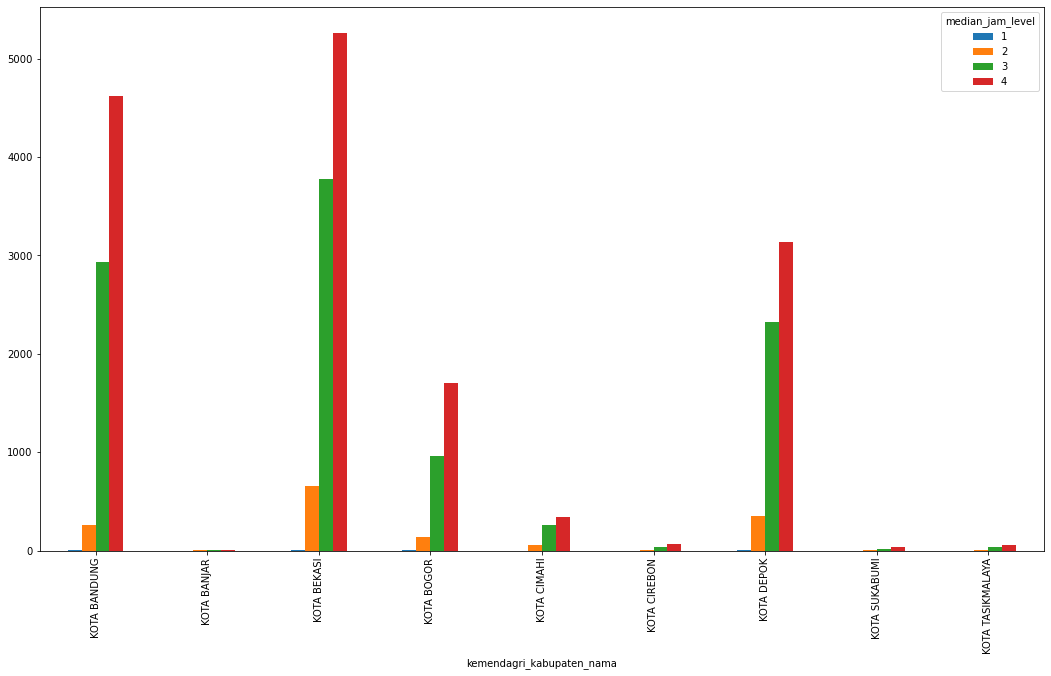

In [101]:
train_set.groupby('kemendagri_kabupaten_nama').median_jam_level.value_counts().unstack().plot.bar(figsize=(18,10))

## Data Distribution

Index(['median_length', 'median_regular_speed', 'median_seconds',
       'median_speed'],
      dtype='object')


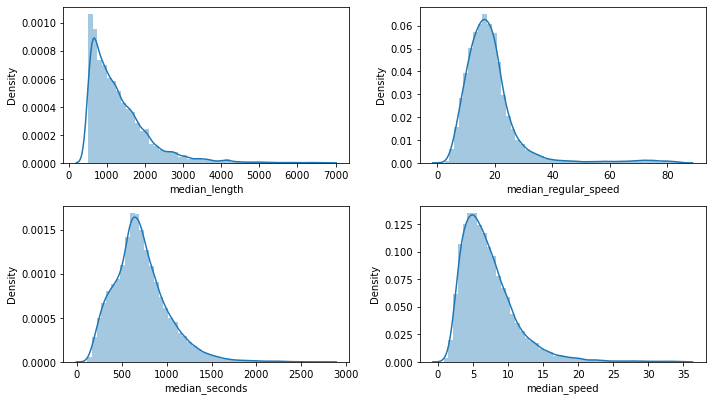

In [102]:
# distribution plots

df_float = train_set.select_dtypes(include='float64')

plt.figure(figsize = (10, 8))
plotnumber = 1

for col in df_float.columns:
    if plotnumber <= 35:
        ax = plt.subplot(3, 2, plotnumber)
        sns.distplot(df_float[col])
        
    plotnumber += 1
    
plt.tight_layout()
print(df_float.columns)
plt.show()

Index(['total_records', 'month', 'day', 'weekday', 'hour', 'median_jam_level'], dtype='object')


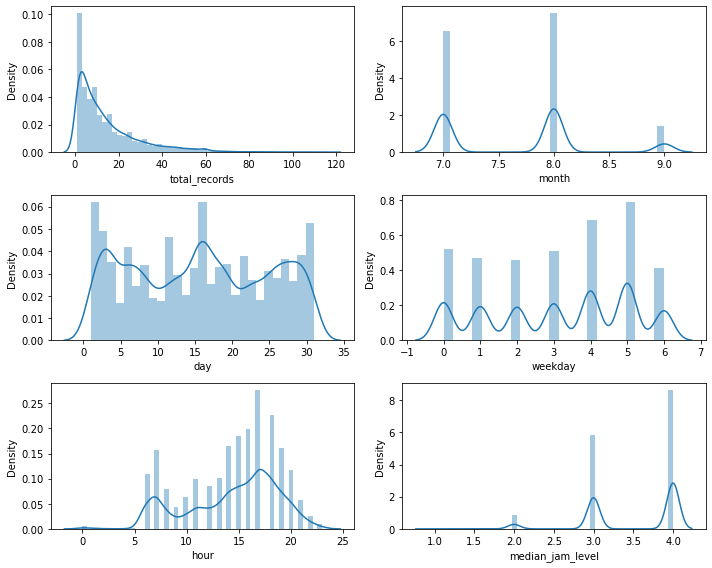

In [103]:
# distribution plots

df_int = train_set.select_dtypes(include='int')

plt.figure(figsize = (10, 8))
plotnumber = 1

for col in df_int.columns:
    if plotnumber <= 10:
        ax = plt.subplot(3, 2, plotnumber)
        sns.distplot(df_int[col])
        
    plotnumber += 1
    
plt.tight_layout()
print(df_int.columns)
plt.show()

Index(['median_length', 'median_regular_speed', 'median_seconds',
       'median_speed'],
      dtype='object')


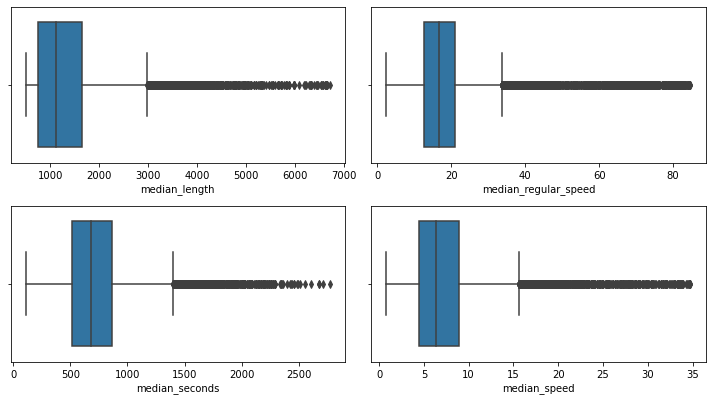

In [104]:
# distribution plots

df_float = train_set.select_dtypes(include='float64')

plt.figure(figsize = (10, 8))
plotnumber = 1

for col in df_float.columns:
    if plotnumber <= 10:
        ax = plt.subplot(3, 2, plotnumber)
        sns.boxplot(df_float[col])
        
    plotnumber += 1
    
plt.tight_layout()
print(df_float.columns)
plt.show()

Index(['total_records', 'month', 'day', 'weekday', 'hour', 'median_jam_level'], dtype='object')


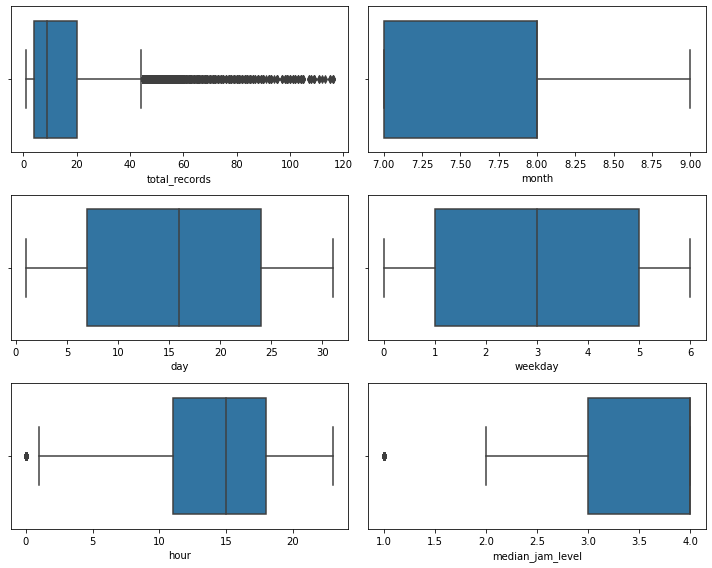

In [105]:
# distribution plots

df_int = train_set.select_dtypes(include='int')

plt.figure(figsize = (10, 8))
plotnumber = 1

for col in df_int.columns:
    if plotnumber <= 6:
        ax = plt.subplot(3, 2, plotnumber)
        sns.boxplot(df_int[col])
        
    plotnumber += 1
    
plt.tight_layout()
print(df_int.columns)
plt.show()

## Pairplot

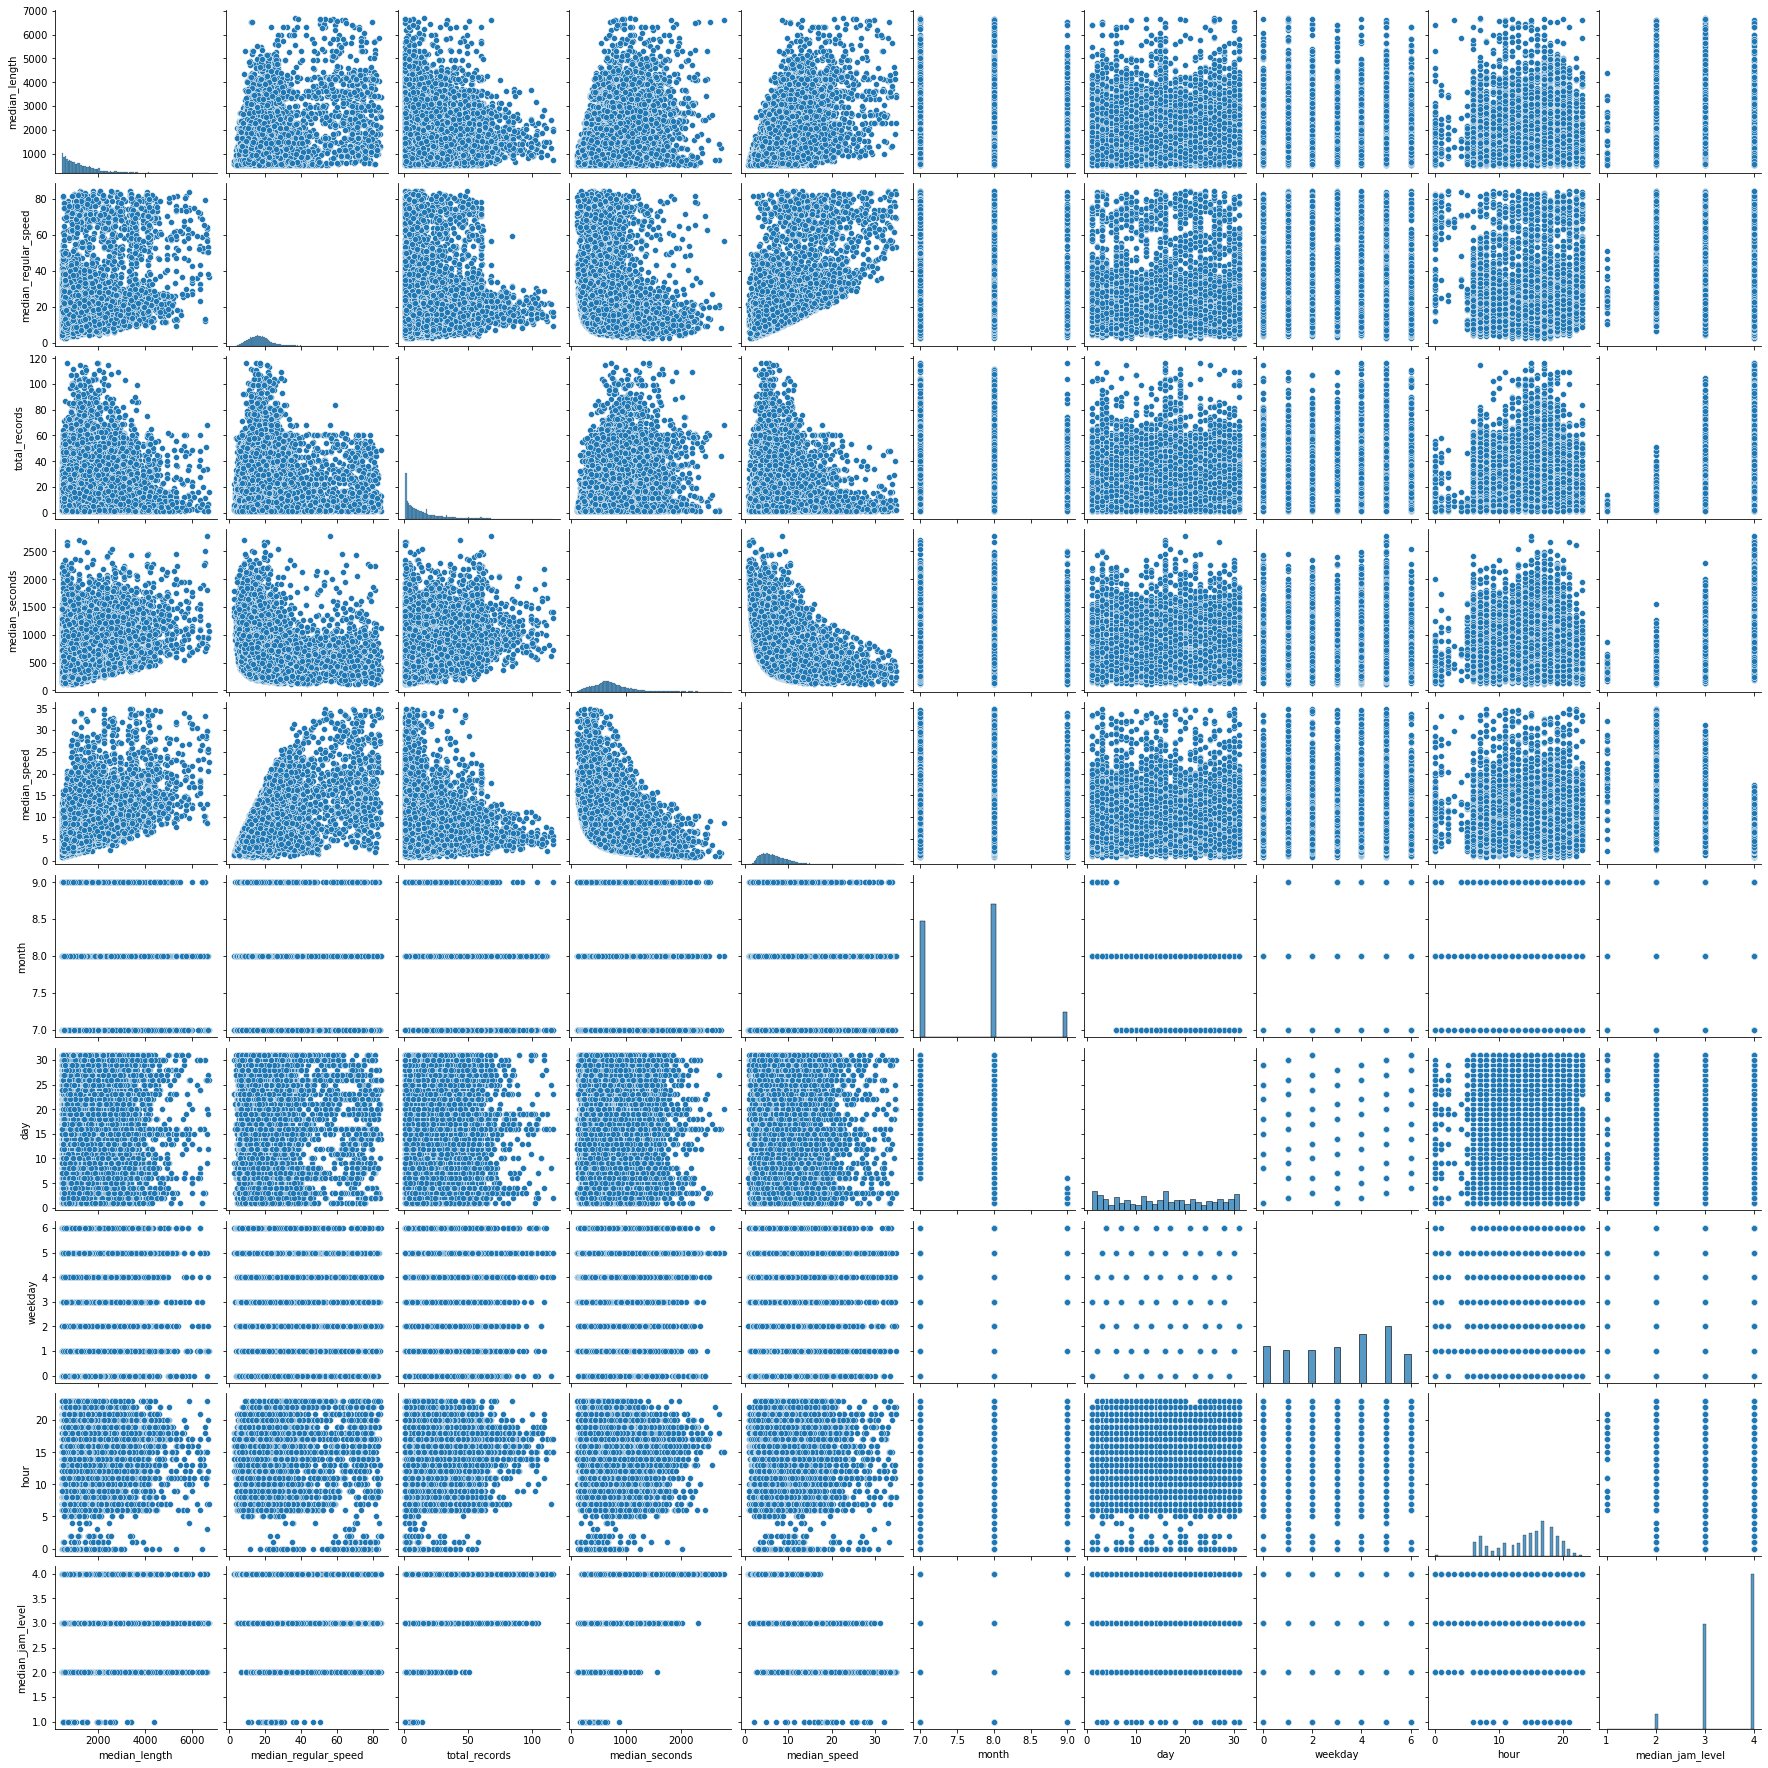

In [106]:
sns.pairplot(train_set);

## Heatmap

<AxesSubplot:>

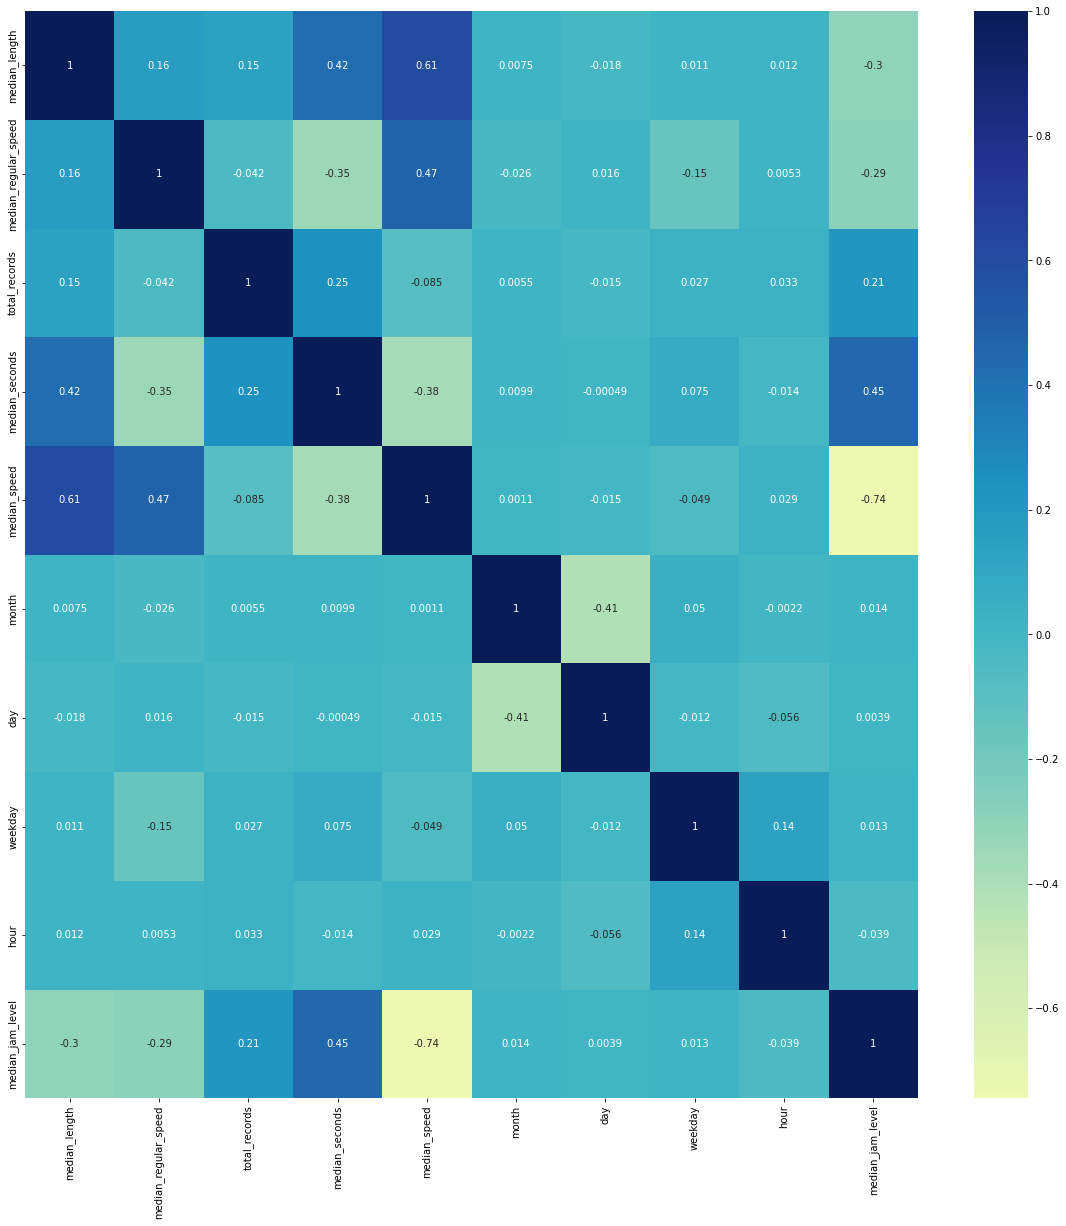

In [107]:
from matplotlib import colors
from matplotlib.colors import ListedColormap

#correlation matrix
corrmat= train_set.corr(method='spearman')
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat,annot=True, cmap="YlGnBu", center=0)

# **Modeling**

In [108]:
## Import Libraries for Classification Modelling
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import OneHotEncoder,PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from imblearn.over_sampling import SMOTE

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier

import optuna
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer

from sklearn.model_selection import KFold, cross_val_predict,GridSearchCV,cross_val_score, RepeatedStratifiedKFold,StratifiedKFold
from sklearn.metrics import accuracy_score,classification_report

#importing plotly and cufflinks in offline mode
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

import plotly 
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

import missingno as msno

import warnings
warnings.filterwarnings("ignore")

In [112]:
## Supervised

accuracy =[]
model_names =[]

categorical = df_cc.select_dtypes('object').columns

X= df_cc.drop('median_jam_level', axis=1)
y= df_cc['median_jam_level']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify= y, random_state=42)

y_train = y_train.astype(int)

ohe= OneHotEncoder()
ct= make_column_transformer((ohe,categorical),remainder='passthrough')  


lr = LogisticRegression(solver='liblinear')
lda= LinearDiscriminantAnalysis()
svm = SVC(gamma='scale')

models = [lr,lda,svm]

for model in models: 
    pipe = make_pipeline(ct, model)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    accuracy.append(round(accuracy_score(y_test, y_pred),4))
    print (f'model : {model} and  accuracy score is : {round(accuracy_score(y_test, y_pred),4)}')

model_names = ['Logistic','LinearDiscriminant','SVM']
result_df1 = pd.DataFrame({'Accuracy':accuracy}, index=model_names)
result_df1

model : LogisticRegression(solver='liblinear') and  accuracy score is : 0.8498
model : LinearDiscriminantAnalysis() and  accuracy score is : 0.8514
model : SVC() and  accuracy score is : 0.8208


,Accuracy
Logistic,0.8498
LinearDiscriminant,0.8514
SVM,0.8208


In [113]:
## Supervised with Numerical Transform

accuracy =[]
model_names =[]

numerical= df_cc.drop(['median_jam_level'], axis=1).select_dtypes('number').columns

y_train = y_train.astype(int)

ohe= OneHotEncoder()
s= StandardScaler()
ct1= make_column_transformer((ohe,categorical),(s,numerical))  


lr = LogisticRegression(solver='liblinear')
lda= LinearDiscriminantAnalysis()
svm = SVC(gamma='scale')

models = [lr,lda,svm]

for model in models: 
    pipe = make_pipeline(ct1, model)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    accuracy.append(round(accuracy_score(y_test, y_pred),4))
    print (f'model : {model} and  accuracy score is : {round(accuracy_score(y_test, y_pred),4)}')

model_names = ['Logistic_scl','LinearDiscriminant_scl','SVM_scl']
result_df2 = pd.DataFrame({'Accuracy':accuracy}, index=model_names)
result_df2

model : LogisticRegression(solver='liblinear') and  accuracy score is : 0.8486
model : LinearDiscriminantAnalysis() and  accuracy score is : 0.8514
model : SVC() and  accuracy score is : 0.875


,Accuracy
Logistic_scl,0.8486
LinearDiscriminant_scl,0.8514
SVM_scl,0.8750


In [114]:
## Boosting

accuracy =[]
model_names =[]

y_train = y_train.astype(int)

ohe= OneHotEncoder()
ct= make_column_transformer((ohe,categorical),remainder='passthrough')  

ada = AdaBoostClassifier(random_state=0)
gb = GradientBoostingClassifier(random_state=0)
rf = RandomForestClassifier(random_state=0)
et=  ExtraTreesClassifier(random_state=0)

models = [ada,gb,rf,et]

for model in models: 
    pipe = make_pipeline(ct, model)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    accuracy.append(round(accuracy_score(y_test, y_pred),4))
    print (f'model : {model} and  accuracy score is : {round(accuracy_score(y_test, y_pred),4)}')

model_names = ['Ada','Gradient','Random','ExtraTree']
result_df3 = pd.DataFrame({'Accuracy':accuracy}, index=model_names)
result_df3

model : AdaBoostClassifier(random_state=0) and  accuracy score is : 0.7977
model : GradientBoostingClassifier(random_state=0) and  accuracy score is : 0.8762
model : RandomForestClassifier(random_state=0) and  accuracy score is : 0.8821
model : ExtraTreesClassifier(random_state=0) and  accuracy score is : 0.8793


,Accuracy
Ada,0.7977
Gradient,0.8762
Random,0.8821
ExtraTree,0.8793


In [120]:
accuracy =[]
model_names =[]

categorical_features_indices = np.where(X.dtypes != np.float)[0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify= y, random_state=42)

y_train = y_train.astype(int)

model = CatBoostClassifier(verbose=False,random_state=0)

model.fit(X_train, y_train,cat_features=categorical_features_indices,eval_set=(X_test, y_test))
y_pred = model.predict(X_test)
accuracy.append(round(accuracy_score(y_test, y_pred),4))

model_names = ['Catboost_default']
result_df5 = pd.DataFrame({'Accuracy':accuracy}, index=model_names)
result_df5

,Accuracy
Catboost_default,0.8857


In [123]:
result_temporary = pd.concat([result_df1,result_df2,result_df3,result_df5],axis=0)
result_temporary.sort_values(by=['Accuracy'], ascending=True,inplace=True)
fig = px.bar(result_temporary, x='Accuracy', y=result_temporary.index,title='Model Comparison',height=600,labels={'index':'MODELS'})
fig.show()

https://www.kaggle.com/code/kaanboke/beginner-friendly-catboost-with-optuna

In [129]:
def objective(trial):
    X= df_cc.drop('median_jam_level', axis=1)
    y= df_cc['median_jam_level']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify= y, random_state=42)
    
    categorical_features_indices = np.where(X.dtypes != np.float)[0]

    param = {
        #"objective": trial.suggest_categorical("objective", ["Logloss", "CrossEntropy"]),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.01, 0.1),
        "depth": trial.suggest_int("depth", 1, 12),
        "boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
        "bootstrap_type": trial.suggest_categorical(
            "bootstrap_type", ["Bayesian", "Bernoulli", "MVS"]
        ),
        "used_ram_limit": "6gb",
    }

    if param["bootstrap_type"] == "Bayesian":
        param["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0, 10)
    elif param["bootstrap_type"] == "Bernoulli":
        param["subsample"] = trial.suggest_float("subsample", 0.1, 1)

    cat_cls = CatBoostClassifier(**param)

    cat_cls.fit(X_train, y_train, eval_set=[(X_test, y_test)], cat_features=categorical_features_indices,verbose=0, early_stopping_rounds=100)

    preds = cat_cls.predict(X_test)
    pred_labels = np.rint(preds)
    accuracy = accuracy_score(y_test, pred_labels)
    return accuracy


if __name__ == "__main__":
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=10, timeout=600)

    print("Number of finished trials: {}".format(len(study.trials)))

    print("Best trial:")
    trial = study.best_trial

    print("  Value: {}".format(trial.value))

    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))

[I 2023-03-03 15:11:45,961] A new study created in memory with name: no-name-5155b260-32e4-4237-b070-385fc98b18f0
[I 2023-03-03 15:14:52,683] Trial 0 finished with value: 0.8821047192559421 and parameters: {'colsample_bylevel': 0.09626672658895997, 'depth': 8, 'boosting_type': 'Ordered', 'bootstrap_type': 'MVS'}. Best is trial 0 with value: 0.8821047192559421.
[I 2023-03-03 15:20:46,727] Trial 1 finished with value: 0.883568722011712 and parameters: {'colsample_bylevel': 0.08559499332938282, 'depth': 10, 'boosting_type': 'Ordered', 'bootstrap_type': 'MVS'}. Best is trial 1 with value: 0.883568722011712.
[I 2023-03-03 15:23:01,115] Trial 2 finished with value: 0.8523079572855666 and parameters: {'colsample_bylevel': 0.032941706507652616, 'depth': 7, 'boosting_type': 'Ordered', 'bootstrap_type': 'MVS'}. Best is trial 1 with value: 0.883568722011712.


Number of finished trials: 3
Best trial:
  Value: 0.883568722011712
  Params: 
    colsample_bylevel: 0.08559499332938282
    depth: 10
    boosting_type: Ordered
    bootstrap_type: MVS


In [132]:
accuracy =[]
model_names =[]

X= df_cc.drop('median_jam_level', axis=1)
y= df_cc['median_jam_level']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify= y, random_state=42)

categorical_features_indices = np.where(X.dtypes != np.float)[0]

model = CatBoostClassifier(verbose=False, random_state=0,
                          colsample_bylevel= 0.08559499332938282, 
                           depth= 10,
                           boosting_type= 'Ordered', 
                           bootstrap_type= 'MVS')

model.fit(X_train, y_train,cat_features=categorical_features_indices,eval_set=(X_test, y_test))
y_pred = model.predict(X_test)
accuracy.append(round(accuracy_score(y_test, y_pred),4))
print(classification_report(y_test, y_pred))

model_names = ['Catboost_tuned']
result_df6 = pd.DataFrame({'Accuracy':accuracy}, index=model_names)
result_df6

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        13
           2       0.85      0.78      0.81       639
           3       0.85      0.85      0.85      4422
           4       0.91      0.92      0.91      6538

    accuracy                           0.88     11612
   macro avg       0.65      0.64      0.64     11612
weighted avg       0.88      0.88      0.88     11612



,Accuracy
Catboost_tuned,0.8836


In [133]:
result = pd.concat([result_df1,result_df2,result_df3,result_df5,result_df6],axis=0)
result.sort_values(by=['Accuracy'], ascending=True,inplace=True)
fig = px.bar(result, x='Accuracy', y=result.index,title='Model Comparison',height=600,labels={'index':'MODELS'})
fig.show()

# **Evaluation**

In [135]:
# Evaluation of Catboost with HyperParameter Tuning
from sklearn.metrics import f1_score

f1_score(y_test, y_pred, average='weighted')

0.8829232149484028

In [136]:
# actual
y_test.value_counts()

4    6538
3    4422
2     639
1      13
Name: median_jam_level, dtype: int64

In [141]:
# Catboost
pd.DataFrame(y_pred.astype(int)).value_counts()

4    6572
3    4449
2     591
dtype: int64